In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import geohash
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Cargar el dataset (suponiendo que lo has cargado previamente en un DataFrame llamado 'data')
# Realiza el preprocesamiento necesario antes de dividir los datos y ajustar el modelo
data = pd.read_excel("tasador2_experimento2.xlsx")
data = data[data['precio'] < 25000]



# data['geohash'] = data.apply(lambda x: geohash.encode_uint64(x.latitud, x.longitud), axis=1)

# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop(columns=['id','precio'])  # Características
y = data['precio']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Normalizar las características usando MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
data

,id,precio,dormitorios,banos,estacionamientos,operacion,tipo_propiedad,region,comuna,area_total,area_construida,condicion,longitud,latitud
0,29292,6900.0,2,2,1,0,1,5,6,63.0,63.0,1,-71.544289,-32.955273
1,29926,5500.0,3,2,1,0,1,5,6,100.0,100.0,1,-71.553032,-33.026428
2,29824,6900.0,3,2,1,0,1,5,6,100.0,100.0,1,-71.547234,-32.955006
4,29684,7000.0,2,2,1,0,1,5,6,83.0,83.0,1,-71.544380,-32.959328
5,29649,12000.0,7,4,4,0,0,5,6,800.0,275.0,1,-71.521896,-32.967476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,20220898,12000.0,5,5,5,0,0,5,6,765.0,284.0,1,-71.543713,-32.971533
781,20220899,10300.0,3,3,2,0,1,5,6,146.0,129.0,1,-71.545167,-32.948877
782,20220902,10937.5,5,4,3,0,0,5,6,320.0,525.0,1,-71.530181,-33.030358
783,20220905,12000.0,5,5,5,0,1,5,6,765.0,284.0,1,-71.543713,-32.971533


#Mejor modelo

El código implementa un Stacking Regressor para predecir valores en un conjunto de datos dividido en conjuntos de entrenamiento y prueba. Se crean modelos base, como Random Forest, Gradient Boosting y Extra Trees, y se configura un Stacking Regressor que combina estos modelos utilizando una Regresión Lineal como meta-modelo. El Stacking Regressor se entrena con el conjunto de entrenamiento y se evalúa en el conjunto de prueba, calculando métricas como el Error Cuadrado Medio (MSE), el Error Absoluto Medio (MAE), el Coeficiente de Determinación (R^2), y el Coeficiente de Error Absoluto Porcentual Medio (MAPE). Los resultados se imprimen para evaluar el rendimiento del Stacking Model en la predicción de valores.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Cargar y preprocesar los datos (como se hizo antes)
# Asume que ya has cargado tus datos en las variables X y y

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crear modelos base (Random Forest, Gradient Boosting, Extra Trees)
rf_model = RandomForestRegressor(n_estimators=415, random_state=43)
gb_model = GradientBoostingRegressor(n_estimators=415, learning_rate=0.1, random_state=43)
et_model = ExtraTreesRegressor(n_estimators=415, random_state=43)
ab_model = AdaBoostRegressor(n_estimators=415, random_state=43)
xgb_model = XGBRegressor(n_estimators=415, random_state=43)
# nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=r)



# Crear un Stacking Regressor que combina los modelos base con una Regresión Lineal como meta-modelo
stacked_model = StackingRegressor(
    estimators=[
        ('RandomForest', rf_model),
        ('GradientBoosting', gb_model),
        ('ExtraTrees', et_model),
        # ('AdaBoost', ab_model),
        # ('XGBoost', xgb_model),
    ],
    final_estimator=make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
)

# Entrenar el Stacking Regressor en el conjunto de entrenamiento
stacked_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_stacked = stacked_model.predict(X_test)

# Calcular métricas en el conjunto de prueba, incluyendo MAPE
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)
mape_stacked = mean_absolute_percentage_error(y_test, y_pred_stacked)
MAPE = mean_absolute_percentage_error(y_test, y_pred_stacked)


print("Stacked Model:")
print(f"Error cuadrado medio (MSE): {mse_stacked}")
print(f"Error absoluto medio (MAE): {mae_stacked}")
print(f"Coeficiente de determinación (R^2): {r2_stacked}")
# print(f"Coeficiente de MAPE: {mape_stacked:.2f}%")
print(f"Coeficiente de MAPE: {MAPE}")


Stacked Model:
Error cuadrado medio (MSE): 4488568.326991534
Error absoluto medio (MAE): 1448.955084127178
Coeficiente de determinación (R^2): 0.8602486591358415
Coeficiente de MAPE: 0.19587255251525754



Este código realiza una validación cruzada del modelo Stacking Regressor utilizando la métrica de Error Absoluto Porcentual Medio (MAPE). Se configura el Stacking Regressor con modelos base como Random Forest, Extra Trees y Gradient Boosting, y se utiliza un Ridge Regressor como meta-modelo. La validación cruzada se realiza en 10 pliegues (ajustable) con datos de entrenamiento y se obtienen los resultados de MAPE para cada pliegue. Los resultados se convierten a porcentajes positivos y se imprimen, mostrando el MAPE promedio y la desviación estándar entre los pliegues para evaluar la consistencia del rendimiento del modelo.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# Definir el modelo
stacked_model = StackingRegressor(
    estimators=[
        ('RandomForest', rf_model),
        ('ExtraTrees', et_model),
        ('GradientBoosting', gb_model),
    ],
    final_estimator=Ridge(alpha=1.0)
)

# Definir el número de pliegues para la validación cruzada
num_folds = 10  # Puedes ajustar este valor según tus necesidades

# Configurar la estrategia de validación cruzada
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener los resultados
mape_scores = cross_val_score(stacked_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Convertir los resultados a porcentajes positivos y mostrarlos
mape_scores = -mape_scores  # Convertir a valores positivos
average_mape = np.mean(mape_scores)
std_mape = np.std(mape_scores)

print(f"Resultados de la validación cruzada (MAPE) en {num_folds} pliegues:")
for fold, score in enumerate(mape_scores, 1):
    print(f"Fold {fold}: MAPE = {score:.2f}%")

print(f"MAPE promedio: {average_mape:.2f}%")
print(f"Desviación estándar de MAPE entre los folds: {std_mape:.2f}%")


Resultados de la validación cruzada (MAPE) en 10 pliegues:
Fold 1: MAPE = 0.21%
Fold 2: MAPE = 0.38%
Fold 3: MAPE = 0.23%
Fold 4: MAPE = 0.24%
Fold 5: MAPE = 0.23%
Fold 6: MAPE = 0.16%
Fold 7: MAPE = 0.24%
Fold 8: MAPE = 0.19%
Fold 9: MAPE = 0.23%
Fold 10: MAPE = 0.24%
MAPE promedio: 0.24%
Desviación estándar de MAPE entre los folds: 0.05%


In [7]:
import pickle
# Grabar el modelo a disco
archivo_sav= 'modelo-final.sav'
pickle.dump(stacked_model, open(archivo_sav, 'wb'))

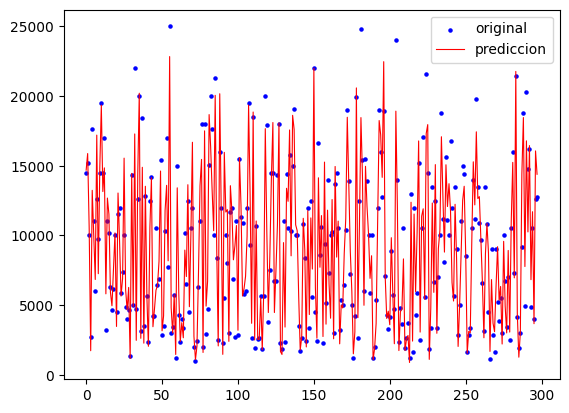

In [8]:
x_ax = range(len(y_pred_stacked))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_stacked, lw=0.8, color="red", label="prediccion")
plt.legend()
plt.show()

#Recomendaciones para mejorar el modelo


### Obtención de Datos Realistas:
Se sugiere adquirir datos lo más verídicos posible de las comunas, buscando equilibrar la cantidad de datos con la proporción presente en Viña del Mar.

### Incorporación de la Columna de Sectorización:
Para una mejora sustancial del modelo, se propone añadir una columna denominada "sectorización". Esta nueva variable permitiría dividir las comunas en sectores, proporcionando al modelo una comprensión más profunda de las fluctuaciones de precios. Aunque las coordenadas de latitud y longitud actualmente desempeñan este papel, la sectorización podría ofrecer una visión más general sin perder especificidad.

### Obtención y Limpieza Exhaustiva de Datos:
Es fundamental asegurar la limpieza óptima de los datos. Se recomienda realizar scraping en portales inmobiliarios para obtener la información necesaria, incluyendo la dirección. Posteriormente, se puede utilizar la API de Google con estas direcciones para obtener latitud y longitud de manera precisa. Este proceso puede automatizarse para garantizar la obtención eficiente de datos, contribuyendo a un conjunto más robusto y homogéneo. Este enfoque, combinado con un aumento en la cantidad de datos, promoverá mejoras notables en el modelo.


